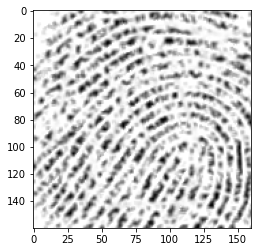

(160, 160)


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "dataset/train_data"
CATEGORIES = ["First", "Second", "Third", "Fourth", "Fifth", "Sixth", "Seventh", "Eighth", "Ninth", "Tenth"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break

print(img_array.shape)

In [18]:
IMG_SIZE = 60

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])
            except Exception as e:
                print(e)
                pass
         
create_training_data()

dataset/train_data\First\00000_00.bmp
dataset/train_data\First\00000_01.bmp
dataset/train_data\First\00000_02.bmp
dataset/train_data\First\00000_03.bmp
dataset/train_data\First\00000_04.bmp
dataset/train_data\First\00000_05.bmp
dataset/train_data\First\00000_06.bmp
dataset/train_data\First\00000_07.bmp
dataset/train_data\First\00000_08.bmp
dataset/train_data\First\00000_09.bmp
dataset/train_data\First\00000_10.bmp
dataset/train_data\First\00000_11.bmp
dataset/train_data\First\00000_12.bmp
dataset/train_data\First\00000_13.bmp
dataset/train_data\First\00000_14.bmp
dataset/train_data\First\00000_15.bmp
dataset/train_data\First\00000_16.bmp
dataset/train_data\First\00000_17.bmp
dataset/train_data\First\00000_18.bmp
dataset/train_data\First\00000_19.bmp
dataset/train_data\First\00000_20.bmp
dataset/train_data\First\00000_21.bmp
dataset/train_data\First\00000_22.bmp
dataset/train_data\First\00000_23.bmp
dataset/train_data\First\00000_24.bmp
dataset/train_data\First\00000_25.bmp
dataset/trai

dataset/train_data\Seventh\00006_39.bmp
dataset/train_data\Seventh\00006_40.bmp
dataset/train_data\Seventh\00006_41.bmp
dataset/train_data\Seventh\00006_42.bmp
dataset/train_data\Seventh\00006_43.bmp
dataset/train_data\Seventh\00006_44.bmp
dataset/train_data\Seventh\00006_45.bmp
dataset/train_data\Seventh\00006_46.bmp
dataset/train_data\Seventh\00006_47.bmp
dataset/train_data\Seventh\00006_48.bmp
dataset/train_data\Seventh\00006_49.bmp
dataset/train_data\Seventh\00006_50.bmp
dataset/train_data\Seventh\00006_51.bmp
dataset/train_data\Seventh\00006_52.bmp
dataset/train_data\Seventh\00006_53.bmp
dataset/train_data\Seventh\00006_54.bmp
dataset/train_data\Seventh\00006_55.bmp
dataset/train_data\Seventh\00006_56.bmp
dataset/train_data\Seventh\00006_57.bmp
dataset/train_data\Seventh\00006_58.bmp
dataset/train_data\Seventh\00006_59.bmp
dataset/train_data\Seventh\00006_60.bmp
dataset/train_data\Seventh\00006_61.bmp
dataset/train_data\Seventh\00006_62.bmp
dataset/train_data\Seventh\00006_63.bmp


In [3]:
import random

random.shuffle(training_data)

In [4]:
X = []
y = []

In [5]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
import pandas
from tensorflow.keras import utils
from sklearn.preprocessing import LabelEncoder   

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X = X/255.0

In [6]:
import pickle

pickle_out = open("trainingSet.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("lablesSet.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import regularizers
import pickle
import numpy as np

X = pickle.load(open("trainingSet.pickle", "rb"))
y = pickle.load(open("lablesSet.pickle", "rb"))

X = np.array(X)
y = np.array(y)

In [8]:
import time
from tensorflow.keras.callbacks import TensorBoard 

dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "FingerPrints-{}-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            tensorboard = TensorBoard(log_dir='trash/{}'.format(NAME), profile_batch=0)
            print(NAME)
            model = Sequential()
            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
            
            for l in range(dense_layer):
                model.add(Dense(32))
                model.add(Activation('relu'))
                model.add(Dropout(0.2))

            model.add(Dense(10))
            model.add(Activation('softmax'))

            model.compile(loss='sparse_categorical_crossentropy', # we need categorical_crossentropy instead of binary_crossentropy
                          optimizer='adam',
                          metrics=['accuracy'])
            model.summary()
            model.fit(X, y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[tensorboard])
            model.save('models_60x60/{}.model'.format(NAME))

FingerPrints-1-32-nodes-0-dense-1608503417
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 58, 58, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 26912)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                269130    
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 269,450
Trainable params: 269,450
Non-trainable params: 0
_______

Epoch 50/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 1.3000 - val_accuracy: 0.5875
Epoch 51/100
20/20 [==============================] - 1s 37ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 1.2333 - val_accuracy: 0.6062
Epoch 52/100
20/20 [==============================] - 1s 35ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 1.2542 - val_accuracy: 0.6125
Epoch 53/100
20/20 [==============================] - 1s 35ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 1.2349 - val_accuracy: 0.6062
Epoch 54/100
20/20 [==============================] - 1s 37ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.2625 - val_accuracy: 0.5875
Epoch 55/100
20/20 [==============================] - 1s 34ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 1.2238 - val_accuracy: 0.6125
Epoch 56/100
20/20 [==============================] - 1s 35ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 1.2442 - val_accuracy: 0.6313

20/20 [==============================] - 2s 80ms/step - loss: 2.3465 - accuracy: 0.0928 - val_loss: 2.2990 - val_accuracy: 0.1250
Epoch 2/100
20/20 [==============================] - 1s 70ms/step - loss: 2.2699 - accuracy: 0.1392 - val_loss: 2.2683 - val_accuracy: 0.1813
Epoch 3/100
20/20 [==============================] - 1s 70ms/step - loss: 2.1586 - accuracy: 0.2478 - val_loss: 2.1358 - val_accuracy: 0.3000
Epoch 4/100
20/20 [==============================] - 1s 74ms/step - loss: 1.9842 - accuracy: 0.3694 - val_loss: 1.9729 - val_accuracy: 0.3500
Epoch 5/100
20/20 [==============================] - 2s 76ms/step - loss: 1.7577 - accuracy: 0.4317 - val_loss: 1.8680 - val_accuracy: 0.4250
Epoch 6/100
20/20 [==============================] - 1s 68ms/step - loss: 1.6137 - accuracy: 0.4570 - val_loss: 1.7132 - val_accuracy: 0.4187
Epoch 7/100
20/20 [==============================] - 1s 70ms/step - loss: 1.3511 - accuracy: 0.5928 - val_loss: 1.6076 - val_accuracy: 0.4000
Epoch 8/100
20/20 

KeyboardInterrupt: 

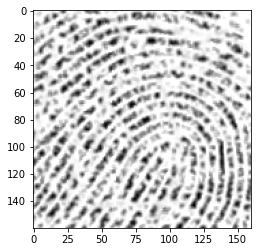

First


In [70]:
import cv2
import tensorflow as tf

DATADIR = "dataset/real_data/"
CATEGORIES = ["First", "Second", "Third", "Fourth", "Fifth", "Sixth", "Seventh", "Eighth", "Ninth", "Tenth"]
IMG_SIZE = 60

def prepare(filepath):
        img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        img_array = img_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
     
        return img_array / 255.0
    
model = tf.keras.models.load_model("models_60x60/FingerPrints-3-64-nodes-1-dense-1608495909.model")

prediction = model.predict([prepare("{}00000.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

In [60]:
prediction = model.predict([prepare("{}00001.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Second


In [61]:
prediction = model.predict([prepare("{}00002.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Third


In [62]:
prediction = model.predict([prepare("{}00003.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Fourth


In [63]:
prediction = model.predict([prepare("{}00004.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Fifth


In [64]:
prediction = model.predict([prepare("{}00005.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Sixth


In [65]:
prediction = model.predict([prepare("{}00006.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Seventh


In [66]:
prediction = model.predict([prepare("{}00007.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Eighth


In [67]:
prediction = model.predict([prepare("{}00008.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Ninth


In [68]:
prediction = model.predict([prepare("{}00009.bmp".format(DATADIR))])
print(CATEGORIES[np.argmax(prediction[0])])

Tenth
